In [1]:
from src.seanmod import *

In [2]:
irisDF = pd.read_csv("./data/iris.csv")
mtcarsDF = pd.read_csv("./data/mtcars.csv")
timeDF = pd.read_csv("./data/timeexample.csv")

## BoxplotBlast() Example:

This code takes a DataFrame as an input, picks out all numerical columns, and then displays stacked 
boxplots for each numerical column. Because some numerical columns can have large tails of outliers,
BoxPlotBlast clips the visualizations, indicating outlier tails or max/min values (with coloured lines).

For the dataset below, we see a lot of variation in outlier tails and bounds. Data scaling might also be required, depending on the modelling applcation.

Guide: Blue lines indicate max/min value. Red Lines indicate cutoff of outliers.


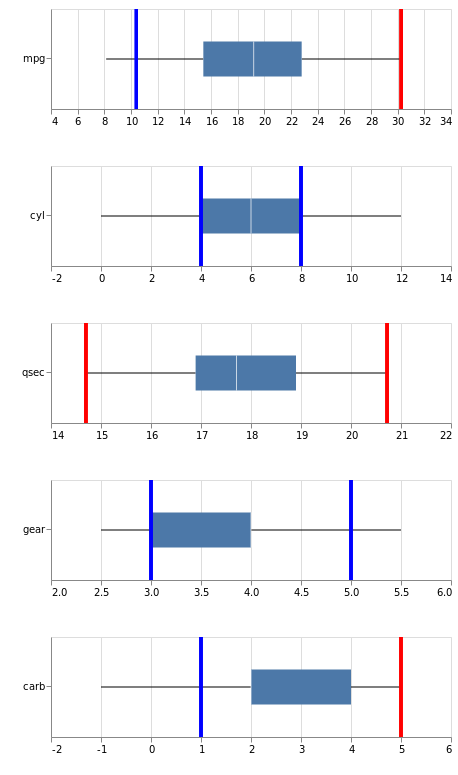

In [3]:
#The MTCARS example:
#The function can be found in seanmod
boxplotblast(mtcarsDF[["mpg","cyl","qsec","gear","carb"]])

## Timeline Visualization Example:

For large datasets with time-series data, an Analyst may wonder about gaps in the data itself. This visualization uses a heatmap to show the number of records in a given time window. It quickly shows if records or missing, or if the number of records per unit time is constant.

We can see clearly in the example below, that some data for a given day is completely missing. For other days, the number of records is heavy/light (not constant).

In [62]:
#Signature: DataFrame, String -> Altair Chart
#Purpose: Give a Dataframe, and a timestamp column. A heatmap will be produced.
#Note: Assumes the timestamp column is in string form (fresh read from a csv or file).
#Do not pass datetime columns!

def dayheatmap(timeDF,tcol):
    if tcol not in timeDF.columns:
        raise ValueError("ERROR: time column given is not in DataFrame!")
    if not isinstance(timeDF[tcol].iloc[1],str):
        raise ValueError("ERROR: time column is not of type string!")
    if (timeDF.shape[0] < 1):
        raise ValueError("ERROR: Dataframe is empty (zero rows).")
    
    timeDF = timeDF.applymap(pd.Timestamp)
    #Conversion for
    timeDF["invoicedate"] = timeDF["invoicedate"].apply(lambda x: str(x.year) + "-" + str(x.month) + "-" + str(x.day))
    timeDF["mark"] = 1

    timeGroup = timeDF[["invoicedate","mark"]].groupby("invoicedate",as_index=False).count()
    
    heatChart = alt.Chart(timeGroup).mark_rect().encode(
      alt.X("yearmonth(invoicedate):O"),
      alt.Y("date(invoicedate):O"),
      alt.Color("mark"))

    return heatChart

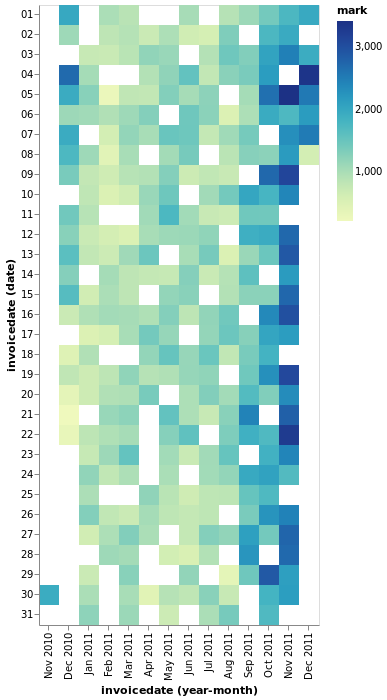

In [63]:
dayheatmap(timeDF,"invoicedate")

## View all Data Frames Example:

Often times, our data set consists of an unzipped folder with many CSV files. The *headtailcsv()* takes a path as an argument, and auto-detects all CSVs in the given directory. For each dataframe, it pulls the head, tail, and samples random rows from the interior of the dataframe, and display()'s the sample of the dataframe to console. This allows a user to quickly inspect all the data very quickly, in one shot. 

In [16]:
import os

#Signature: String, Integer -> NoneType
#Purpose: Grab every csv dataframe in a directory, and give a summary output of it for user.
#Defaults: Path=PWD, n=5. n specifies how many rows in the head/tail/body sections to sample.
def headtailcsvs(path=".",n=5):
    if not isinstance(path,str):
        raise ValueError("ERROR: path is not a string.")
    if not int(n) == n or n < 1:
        raise ValueError("ERROR: n is not an integer or < 1.")
    if (not os.path.exists(path)):
        raise ValueError("ERROR: path does not exist.")
    if (path[-1:] == "/" ): #I assume no trailing slash. If user added it, remove.
        path = path[:len(path) - 1]
     
    dirList = os.listdir(path)
    #Not efficient, but does the job. ¯\_(ツ)_/¯ Do FunProg tricks later.
    keepList = []
    for item in dirList:
        if item[-3:] == "csv":
            keepList.append(item)
    
    for item in keepList:
        currDF = pd.read_csv(path + "/" + item)
        if (currDF.shape[0] < 3*n):
            raise ValueError("ERROR: Can't sample csv file: " + item +". Rows < 3*n.")
        
        rowLen = currDF.shape[0]
        frames = [currDF.head(n),currDF.iloc[n:(rowLen - n)].sample(n).sort_index(axis=0),currDF.tail(n)]
        display(item)
        display(pd.concat(frames))
            
    return None

In [18]:
headtailcsvs("./data/salesjourney/",2)

27


'transaction_data.csv'

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
11,1364,26984896261,1,842930,1,2.19,31742,0.00,1520,1,0,0
21,1173,26984945254,1,824399,2,1.98,412,0.00,2042,1,0,0
25,98,26984951769,1,965138,2,3.00,337,-0.08,1937,1,0,0
26,98,26984951769,1,985911,1,1.25,337,-0.34,1937,1,0,0


27


'coupon.csv'

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
10,52100000031,29096,22
20,51600070033,30699,9
25,51200000009,32124,25
26,51800000050,32272,12


27


'product.csv'

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
14,27030,69,GROCERY,Private,ICE CREAM/MILK/SHERBTS,TRADITIONAL,56 OZ
17,27159,69,GROCERY,Private,CHEESE,STRING CHEESE,1 OZ
25,27503,69,GROCERY,Private,FRUIT - SHELF STABLE,CRANBERRY SAUCE,16 OZ
26,27509,69,GROCERY,Private,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ


27


'campaign_table.csv'

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
6,TypeA,183,26
25,TypeA,2384,26
26,TypeA,2371,26


27


'hh_demographic.csv'

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
6,45-54,A,100-124K,Homeowner,2 Adults No Kids,2,None/Unknown,18
25,45-54,A,Under 15K,Homeowner,2 Adults Kids,5+,3+,67
26,35-44,A,25-34K,Homeowner,Single Female,2,None/Unknown,71


27


'coupon_redempt.csv'

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
11,13,494,53600000082,10
17,13,609,10000089277,18
25,13,647,54400021032,22
26,13,651,51800000050,22


27


'campaign_desc.csv'

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
12,TypeA,13,504,551
16,TypeB,9,435,467
25,TypeA,30,323,369
26,TypeB,29,281,334


27


'causal_data.csv'

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer
0,26190,286,70,0,A
1,26190,288,70,0,A
4,26190,293,70,0,A
10,26190,300,70,0,A
25,26190,323,70,5,A
26,26190,324,70,0,A
